In [ ]:
%pip install requests
%pip install pprintpp
%pip install pandas
%pip install vaderSentiment
%pip install seaborn


In [4]:
import requests

In [5]:
import pandas as pd

In [6]:
from pprintpp import pprint 


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:


def info_news():
    news_params = {
        "api-key": "[YOUR_API_KEY]",
    }
    NEWS_ENDPOINT = "https://api.nytimes.com/svc/mostpopular/v2/viewed/30.json"
    news_response = requests.get(NEWS_ENDPOINT, params=news_params)
    articles = news_response.json()


    return articles




In [9]:
info = info_news()

In [11]:
info["results"][0]['title']

'A Total Lunar Eclipse in Early Tuesday Skies'

In [18]:
n = 1
for i in info["results"]:
    print(f"title number {n} :  {i['title']}")
    n += 1

title number 1 :  A Total Lunar Eclipse in Early Tuesday Skies
title number 2 :  Julie Powell, Food Writer Known for ‘Julie & Julia,’ Dies at 49
title number 3 :  Takeoff, of Atlanta Rap Trio Migos, Shot Dead at 28
title number 4 :  Amazon Is Said to Plan to Lay Off Thousands of Employees
title number 5 :  Tiffany Trump Weds at Mar-a-Lago
title number 6 :  Aaron Carter, Singer and Onetime Teenage Sensation, Dies at 34
title number 7 :  4 University of Idaho Students Killed in ‘Crime of Passion’
title number 8 :  $2 Billion Powerball Ticket Sold in Los Angeles County, Lottery Officials Said
title number 9 :  What We Know About the Attack on Nancy Pelosi’s Husband
title number 10 :  Former Anti-Abortion Leader Alleges Another Supreme Court Breach
title number 11 :  Ban on Beer Is Latest Flash Point in World Cup Culture Clash
title number 12 :  Nets Suspend Kyrie Irving Indefinitely After Antisemitic Movie Post
title number 13 :  Adidas Ends Partnership With Kanye West at a Considerable C

In [12]:
Title = []
Abstract = []
Keyword = []
Author =[]
Date = []
Id = []



for i in info["results"]:
    Title.append(i['title'])
    Abstract.append(i['abstract'])
    Keyword.append(i['des_facet'])
    Author.append(i['byline'])
    Date.append(i['updated'])
    Id.append(i['id'])
    

In [13]:
d = {
    "Title" : Title,
    "Abstract" : Abstract,
    "Keyword" : Keyword,
    "Author" : Author,
    "Date" :  Date,
    "Id" : Id
}

df = pd.DataFrame(data=d)
df

,Title,Abstract,Keyword,Author,Date,Id
0,A Total Lunar Eclipse in Early Tuesday Skies,Those who woke up early to head to the polls o...,"[Eclipses, Moon, Earth, Space and Astronomy]",By Shannon Hall,2022-11-10 08:08:39,100000008608513
1,"Julie Powell, Food Writer Known for ‘Julie & J...",She attempted to cook every recipe in a classi...,"[Deaths (Obituaries), Cooking and Cookbooks, W...",By Kim Severson and Julia Moskin,2022-11-03 14:41:34,100000008609963
2,"Takeoff, of Atlanta Rap Trio Migos, Shot Dead ...",The rapper was killed in a shooting at a bowli...,"[Murders, Attempted Murders and Homicides, Rap...",By Joe Coscarelli and J. David Goodman,2022-11-02 10:53:08,100000008610659
3,Amazon Is Said to Plan to Lay Off Thousands of...,"The job cuts of approximately 10,000, which wo...","[E-Commerce, Computers and the Internet, Layof...",By Karen Weise,2022-11-15 14:41:43,100000008636027
4,Tiffany Trump Weds at Mar-a-Lago,"Tiffany Trump and Michael Boulos, whose weddin...",[Weddings and Engagements],By Tammy La Gorce,2022-11-13 18:17:30,100000008611753
5,"Aaron Carter, Singer and Onetime Teenage Sensa...","Mr. Carter, who released his first album at ag...","[Deaths (Obituaries), Pop and Rock Music]",By Melina Delkic and McKenna Oxenden,2022-11-10 13:39:00,100000008620493
6,4 University of Idaho Students Killed in ‘Crim...,The authorities were still piecing together wh...,"[Murders, Attempted Murders and Homicides, Col...","By Rachel Sun, Mike Baker, Nicholas Bogel-Burr...",2022-11-17 13:54:43,100000008637341
7,$2 Billion Powerball Ticket Sold in Los Angele...,The identity of the winner or winners is not y...,"[Lotteries, Taxation]","By Remy Tumin, Amanda Holpuch and Johnny Diaz",2022-11-08 22:43:01,100000008616151
8,What We Know About the Attack on Nancy Pelosi’...,"Paul Pelosi, 82, underwent surgery for a skull...",[Assaults],By Amanda Holpuch,2022-10-31 18:55:31,100000008605152
9,Former Anti-Abortion Leader Alleges Another Su...,Years before the leaked draft opinion overturn...,"[Abortion, Birth Control and Family Planning, ...",By Jodi Kantor and Jo Becker,2022-11-21 11:20:17,100000008603949


In [14]:

# import SentimentIntensityAnalyzer class
# from vaderSentiment.vaderSentiment module.
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
 
# function to print sentiments
# of the sentence.
def sentiment_scores(sentence):
 
    # Create a SentimentIntensityAnalyzer object.
    sid_obj = SentimentIntensityAnalyzer()
 
    # polarity_scores method of SentimentIntensityAnalyzer
    # object gives a sentiment dictionary.
    # which contains pos, neg, neu, and compound scores.
    sentiment_dict = sid_obj.polarity_scores(sentence)
     
    print("Overall sentiment dictionary is : ", sentiment_dict)
    print("sentence was rated as ", sentiment_dict['neg']*100, "% Negative")
    print("sentence was rated as ", sentiment_dict['neu']*100, "% Neutral")
    print("sentence was rated as ", sentiment_dict['pos']*100, "% Positive")
 
    print("Sentence Overall Rated As", end = " ")
 
    # decide sentiment as positive, negative and neutral
    if sentiment_dict['compound'] >= 0.05 :
        print("Positive")
 
    elif sentiment_dict['compound'] <= - 0.05 :
        print("Negative")
 
    else :
        print("Neutral")
        
    return sentiment_dict['compound']
 

In [40]:
sentiment_scores(df['Keyword'][6])

Overall sentiment dictionary is :  {'neg': 0.615, 'neu': 0.385, 'pos': 0.0, 'compound': -0.8402}
sentence was rated as  61.5 % Negative
sentence was rated as  38.5 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Negative


-0.8402

In [15]:
sentiment_scores("hello, I'm very happy but I hate mondays")

Overall sentiment dictionary is :  {'neg': 0.373, 'neu': 0.443, 'pos': 0.184, 'compound': -0.5504}
sentence was rated as  37.3 % Negative
sentence was rated as  44.3 % Neutral
sentence was rated as  18.4 % Positive
Sentence Overall Rated As Negative


-0.5504

In [16]:
df["sentiment_scores"] = df["Abstract"].apply(lambda x: sentiment_scores(x))

Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Neutral
Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.909, 'pos': 0.091, 'compound': 0.4215}
sentence was rated as  0.0 % Negative
sentence was rated as  90.9 % Neutral
sentence was rated as  9.1 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is :  {'neg': 0.257, 'neu': 0.743, 'pos': 0.0, 'compound': -0.6705}
sentence was rated as  25.7 % Negative
sentence was rated as  74.3 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is :  {'neg': 0.081, 'neu': 0.919, 'pos': 0.0, 'compound': -0.296}
sentence was rated as  8.1 % Negative
sentence was rated as  91.9 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Negative
Overall sentiment diction

In [ ]:
df["sentiment_scores"] = df["Abstract"].apply(lambda x: sentiment_scores(x))
df["sentiment_keywords_scores"] = df["Keyword"].apply(lambda x: sentiment_scores(x))

In [18]:
def sentiment(score):
    score = float(score)
    
    # decide sentiment as positive, negative and neutral
    if score >= 0.05 :
        return "Positive"
 
    elif score <= - 0.05 :
        return "Negative"
 
    else :
        return "Neutral"
    

In [19]:
df["sentiment"] = df["sentiment_scores"].apply(lambda x: sentiment(x))

In [44]:
df["sentiment_keywords"] = df["sentiment_keywords_scores"].apply(lambda x: sentiment(x))


In [45]:
df

,Title,Abstract,Keyword,Author,Date,Id,sentiment_scores,sentiment,text_clean,sentiment_keywords_scores,sentiment_keywords
0,A Total Lunar Eclipse in Early Tuesday Skies,Those who woke up early to head to the polls o...,"[Eclipses, Moon, Earth, Space and Astronomy]",By Shannon Hall,2022-11-10 08:08:39,100000008608513,0.0000,Neutral,woke early head polls tuesday got shot seeing ...,0.0000,Neutral
1,"Julie Powell, Food Writer Known for ‘Julie & J...",She attempted to cook every recipe in a classi...,"[Deaths (Obituaries), Cooking and Cookbooks, W...",By Kim Severson and Julia Moskin,2022-11-03 14:41:34,100000008609963,0.4215,Positive,attempted cook every recipe classic julia chil...,0.0000,Neutral
2,"Takeoff, of Atlanta Rap Trio Migos, Shot Dead ...",The rapper was killed in a shooting at a bowli...,"[Murders, Attempted Murders and Homicides, Rap...",By Joe Coscarelli and J. David Goodman,2022-11-02 10:53:08,100000008610659,-0.6705,Negative,rapper killed shooting bowling alley houston o...,-0.8402,Negative
3,Amazon Is Said to Plan to Lay Off Thousands of...,"The job cuts of approximately 10,000, which wo...","[E-Commerce, Computers and the Internet, Layof...",By Karen Weise,2022-11-15 14:41:43,100000008636027,-0.2960,Negative,job cuts approximately would start soon week w...,0.0000,Neutral
4,Tiffany Trump Weds at Mar-a-Lago,"Tiffany Trump and Michael Boulos, whose weddin...",[Weddings and Engagements],By Tammy La Gorce,2022-11-13 18:17:30,100000008611753,-0.2748,Negative,tiffany trump michael boulos whose wedding alm...,0.1531,Positive
5,"Aaron Carter, Singer and Onetime Teenage Sensa...","Mr. Carter, who released his first album at ag...","[Deaths (Obituaries), Pop and Rock Music]",By Melina Delkic and McKenna Oxenden,2022-11-10 13:39:00,100000008620493,0.0000,Neutral,carter released first album age aaron party ag...,0.0000,Neutral
6,4 University of Idaho Students Killed in ‘Crim...,The authorities were still piecing together wh...,"[Murders, Attempted Murders and Homicides, Col...","By Rachel Sun, Mike Baker, Nicholas Bogel-Burr...",2022-11-17 13:54:43,100000008637341,0.0000,Neutral,authorities still piecing together transpired ...,-0.8402,Negative
7,$2 Billion Powerball Ticket Sold in Los Angele...,The identity of the winner or winners is not y...,"[Lotteries, Taxation]","By Remy Tumin, Amanda Holpuch and Johnny Diaz",2022-11-08 22:43:01,100000008616151,0.7783,Positive,identity winner winners yet known california l...,0.0000,Neutral
8,What We Know About the Attack on Nancy Pelosi’...,"Paul Pelosi, 82, underwent surgery for a skull...",[Assaults],By Amanda Holpuch,2022-10-31 18:55:31,100000008605152,-0.5267,Negative,paul pelosi 82 underwent surgery skull fractur...,-0.5423,Negative
9,Former Anti-Abortion Leader Alleges Another Su...,Years before the leaked draft opinion overturn...,"[Abortion, Birth Control and Family Planning, ...",By Jodi Kantor and Jo Becker,2022-11-21 11:20:17,100000008603949,-0.2500,Negative,years leaked draft opinion overturning roe wad...,0.5574,Positive


NLP Data Viz

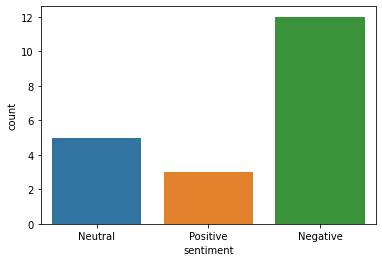

In [21]:
sns.countplot(x="sentiment", data=df);

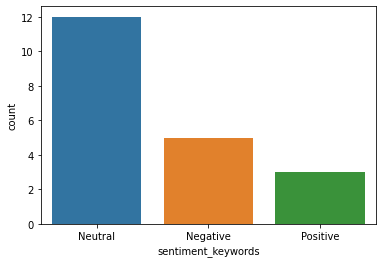

In [46]:
sns.countplot(x="sentiment_keywords", data=df);

Visualise most frequent word

In [22]:
import nltk
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [23]:
stop_words = set(stopwords.words('english'))
print(stop_words)


{'who', 'its', 'then', "shan't", 'after', 'from', 'off', 'i', 'all', "doesn't", 'ours', "that'll", 'wouldn', 'they', "hasn't", 'whom', 'with', 'which', 'here', 'what', 'itself', 'their', 'at', 'more', 'only', 'been', 'doing', 'each', 'have', 'down', "hadn't", 'some', 'my', 'about', 'ma', 'while', 'why', 'that', 'herself', 'needn', 'weren', 'yourself', 'an', 'during', 'in', "don't", 'other', 'be', 'did', 'should', "you're", 'most', 'wasn', 'between', 'any', 'll', 'ourselves', 'this', "needn't", 't', "mustn't", 'the', 'no', 'now', 'but', 'ain', "wasn't", 'mustn', 'there', "isn't", 'isn', 'couldn', 'hasn', "mightn't", 'y', "you'll", 'hers', 'theirs', 'having', 'both', 'and', 'shouldn', 'didn', 'same', 'can', 'once', 'd', 'mightn', 'shan', 'out', 'if', 'them', 'because', 'aren', 'of', 'a', 'are', 'was', "aren't", 'than', 'am', 'where', 'your', 'into', 'she', 'her', 'is', 'below', 'not', 'own', 'hadn', 'had', 'our', 'such', 's', 'he', "she's", 'themselves', 'do', 'up', "should've", 'before'

In [48]:
from nltk.tokenize import word_tokenize


txt_clean = []
for i in df.index:
    comment = df["Abstract"][i].lower()
    comment = word_tokenize(comment, language='english')
    comment_clean = []
    for w in comment:
        if (w not in stop_words) and (w.isalpha() or w.isnumeric()) and len(w)>1:
            comment_clean.append(w)
    txt_clean.append(" ".join(comment_clean))

df['text_clean'] = txt_clean



In [26]:
from nltk import FreqDist

train_string = ' '.join(df['text_clean'])
splits = train_string.split() 
freq_splits = FreqDist(splits)
print('50 most common words \n', freq_splits.most_common(100), '\n')

50 most common words 
 [('company', 3), ('said', 3), ('twitter', 3), ('effort', 2), ('movie', 2), ('would', 2), ('week', 2), ('carter', 2), ('first', 2), ('age', 2), ('home', 2), ('known', 2), ('pelosi', 2), ('expected', 2), ('antisemitic', 2), ('musk', 2), ('killer', 2), ('two', 2), ('woke', 1), ('early', 1), ('head', 1), ('polls', 1), ('tuesday', 1), ('got', 1), ('shot', 1), ('seeing', 1), ('moon', 1), ('darken', 1), ('fell', 1), ('earth', 1), ('shadow', 1), ('attempted', 1), ('cook', 1), ('every', 1), ('recipe', 1), ('classic', 1), ('julia', 1), ('child', 1), ('cookbook', 1), ('documented', 1), ('popular', 1), ('blog', 1), ('became', 1), ('book', 1), ('hit', 1), ('rapper', 1), ('killed', 1), ('shooting', 1), ('bowling', 1), ('alley', 1), ('houston', 1), ('overnight', 1), ('job', 1), ('cuts', 1), ('approximately', 1), ('start', 1), ('soon', 1), ('focus', 1), ('devices', 1), ('organization', 1), ('retail', 1), ('division', 1), ('human', 1), ('resources', 1), ('tiffany', 1), ('trump', 

In [27]:
def visualize_freq(df, n=50):
    
    tokens = []
    for i in df.index:
        t = df["text_clean"][i].split()
        tokens = tokens + t
    
    freq = FreqDist(tokens)
    top_words = sorted(freq.items(), key=lambda x: x[1], reverse=True)[:n]  # descending order

    plt.figure(figsize=(10, 5))
    freq.plot(n, cumulative=False)
    plt.show()

    return top_words

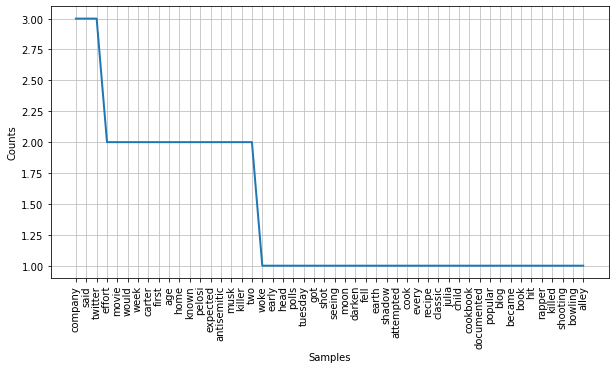

In [28]:
top_words = visualize_freq(df)

<h3>Visualize through Sentiment :</h3>

sentiment=negative: 


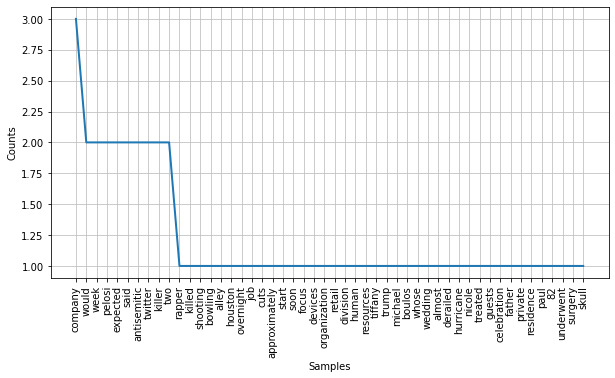

sentiment=positive: 


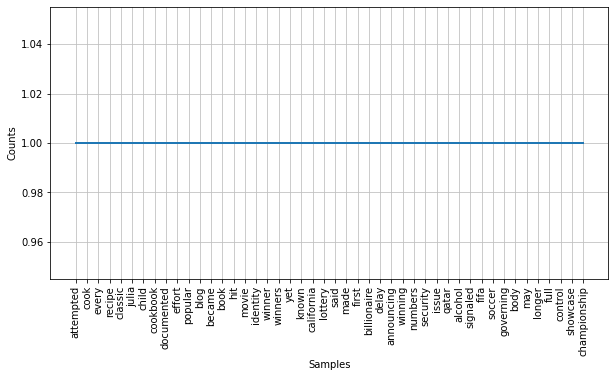

sentiment=Neutral: 


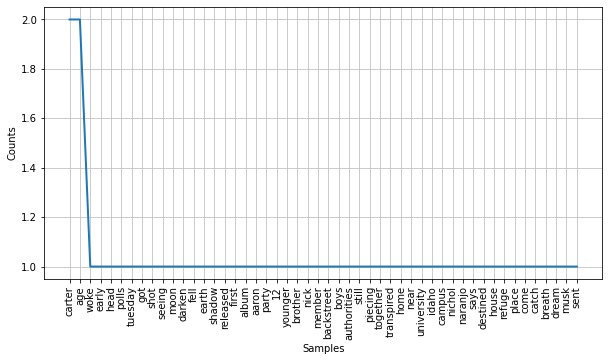

In [31]:
print("sentiment=negative: ")
top_words_0 = visualize_freq(df[df['sentiment']=="Negative"])
print("sentiment=positive: ")
top_words_1 = visualize_freq(df[df['sentiment']=="Positive"])
print("sentiment=Neutral: ")
top_words_2 = visualize_freq(df[df['sentiment']=="Neutral"])


<h3> see it in a worldcloud </3>

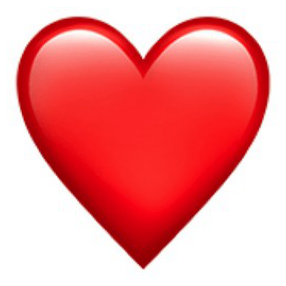

In [32]:
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt


url = "https://www.elle.ci/wp-content/uploads/2020/05/red-heart.jpg"


response = requests.get(url)
img = Image.open(BytesIO(response.content))

# displaying the image
plt.figure(figsize= (10,5))
plt.imshow(img)
plt.axis('off');

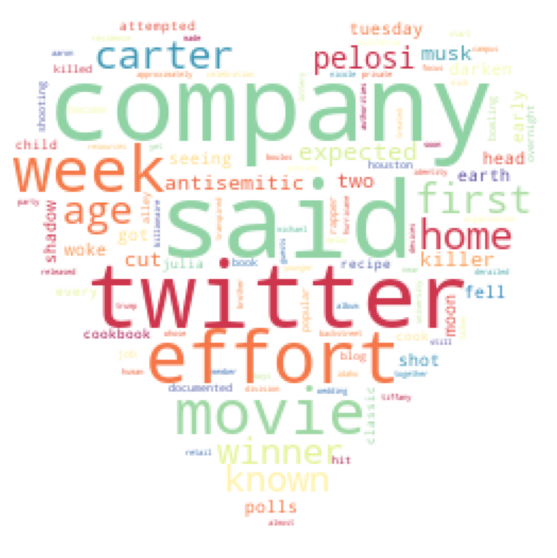

In [37]:
from wordcloud import WordCloud

wc = WordCloud(background_color="white", max_words=400, mask = np.array(img), colormap=plt.cm.Spectral, max_font_size=50, random_state=42)

txt_clean = " ".join(df['text_clean'])
wc.generate(txt_clean)

plt.figure(figsize= (20,10))
plt.imshow(wc)
plt.axis('off');